# Simple Linear Regression

### Introduction

In this notebook, I implemented a Simple Linear Regression model using gradient descent as the optimization algorithm with MSE as the loss function. To ensure comprehensive understanding and model correctness, I implemented gradient descent algorithm in two versions: a manual loop-based version and a vectorized Numpy version. Also, I used the class implementstion to demonstrate the model for a compatable appraoch to future deployment as I go further in Machine Learning course!.

### Methodology

This notebook employs __three methodologies__ to ensure comperhensive understanding and results verification:

1. __Gradient Descent__: following the step_by_step guide of calculating gradient descent, computing step sizes, and adjusting learning rate to get step sizes to zero as close as possible[1,7].

__Extras:__

2. __Analytical Solution__: The applied regression problem can be solved using _the closed form computation_ or _closed form solution_ (least square) as it meets the requirements verified in STAT301 course[2,3]. Further explination in Additional Category.

3. __sklearn__: using __sklearn__ library as refered in the AI221 textbook[5], as it solves a similar problem, for further results validation. 

### Contents:
1. Requirements

2. Model Implementation

3. Training and Evaluating Metrics

4. Code Logic Explination

5. Additionals
- Analytical and sklearn implementation

6. Additionals Test Code

7. Conclusion

8. References

#### NOTE
The main goal of this notebook is to implement simple linear regression using gradient descent from scratch. __Additional methods (least square, sklearn) are included for results validation and comperhensive understanding__.

#### Requirements

In [2]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import csv

#### Model Implementation

In [24]:
class SimpleLinearRegression():
    '''Simple Linear Regression model using Batch Gradient Descent.\nAttributes:
    slope: float
        The coefficient (B1)
    intercept: float
        The intercept (B0)
    loss: list
        History of MSE values in training
    learning_rate: float
        Adjust step size of gradient descent
    epochs: int
        Number of iteration in training
    mse: float
        Final MSE value after adjusting weights'''
    # object initilization
    def __init__(self):
        # hyperparameters
        self.slope = None
        self.intercept = None
        self.mse = None
        self.learning_rate = None
        self.epochs = None
        self.loss = []

    # train
    def gradient_descent(self, x: np.array, y: np.array, epochs = 1000, learning_rate= 0.00001) -> tuple:
        '''Compute slope and intercept using batch gradient descent.\nParameters:
        x (np.array): Input features
        y (np.array): True target values.\nReturns:
        tuple: (slope, intercept) data_Type: np.float64'''    
        # ensure floating point computation precision
        x = x.astype(np.float64)
        y = y.astype(np.float64)
        # hyperparameters
        self.epochs = epochs # least loss reached when epochs = 100000
        self.learning_rate = learning_rate # least loss reached when learning rate 0.0001
        B0 = 0.0 # start with dummy values for slope and intercept
        B1 = 0.0
        prev_loss = None
        self.loss = []
        n = float(len(x))
        # iterations
        for epoch in range(epochs):
            y_pred = B0 + B1 * x # u can use predict()
            curr_loss = np.mean((y-y_pred)**2) # MSE -> u can use mse_loss()
            # early break when loss is not descending
            if prev_loss and np.abs(prev_loss - curr_loss) < 0.001:
                print("Training stopped: loss is not descending")
                break
            prev_loss = curr_loss
            self.loss.append(float(curr_loss))
            # partial derivative for slope
            grad_B0 = -2.0 * np.sum(y - y_pred) * 1/n # 1/n help normalizing gradient so it doesn't get uncontrollably large! 'Exploding Gradient'
            # partial derivative for intercept
            grad_B1 = -2.0 * np.sum(x * (y - y_pred)) * 1/n
            # adjust weights 
            B0 = B0 - (grad_B0 * learning_rate) # changing old slope
            B1 = B1 - (grad_B1 * learning_rate) # changing old intercept
            # print training progress
            if epoch % 10 == 0:
                print(f"epoch: {epoch} loss: {curr_loss:.4f} B1: {B1:.4f} B0: {B0:.4f} Step Size B1: {grad_B1:.4f} Step Size B0: {grad_B0:.4f}")
        
        # update hyperparameter
        self.slope = B1
        self.intercept = B0
        self.mse = curr_loss # or mse_loss(y, y_pred) and it should give the same results since it uses the last current loss and the last y_pred
        return self.slope, self.intercept

    # hypothesis function
    def predict(self, input: np.array) -> np.array:
        '''Predict new output based on a given new data entry.\nParameters:
        input (np.array): Input features.\nReturns:
        np.array: predicted values'''
        return self.intercept + self.slope * input
    # evaluation - loss function
    def mse_loss(self, y_true:np.array, y_pred:np.array) -> float:
        '''Calculate the loss using Mean Squared Error (MSE).\nParameters:
        y_true (np.array): true targets.
        y_pred (np.array): predicted targets.\nReturns:
        float: error value (loss)'''
        return float(np.mean((y_true - y_pred)**2))


#### Training and Evaluating Metrics

Printing instances in dataset
   weight  height
0    50.0   152.0
1    60.0   165.0
2    65.0   168.0
3    70.0   174.0
4    85.0   186.0


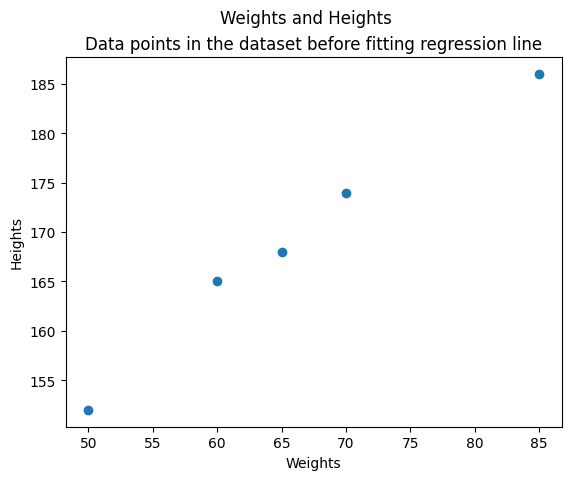

Training - Epochs and Loss per each epoch

epoch: 0 loss: 28685.0000 B1: 0.2256 B0: 0.0034 Step Size B1: -22564.0000 Step Size B0: -338.0000
epoch: 10 loss: 4652.5334 B1: 1.6200 B0: 0.0245 Step Size B1: -8804.1823 Step Size B0: -135.7385
epoch: 20 loss: 993.6362 B1: 2.1640 B0: 0.0331 Step Size B1: -3435.2440 Step Size B0: -56.8181
epoch: 30 loss: 436.5732 B1: 2.3763 B0: 0.0369 Step Size B1: -1340.3400 Step Size B0: -26.0242
epoch: 40 loss: 351.7582 B1: 2.4591 B0: 0.0387 Step Size B1: -522.9301 Step Size B0: -14.0087
epoch: 50 loss: 338.8418 B1: 2.4914 B0: 0.0398 Step Size B1: -203.9853 Step Size B0: -9.3204
epoch: 60 loss: 336.8720 B1: 2.5040 B0: 0.0407 Step Size B1: -79.5363 Step Size B0: -7.4910
epoch: 70 loss: 336.5687 B1: 2.5089 B0: 0.0414 Step Size B1: -30.9776 Step Size B0: -6.7772
epoch: 80 loss: 336.5191 B1: 2.5109 B0: 0.0420 Step Size B1: -12.0305 Step Size B0: -6.4986
Training stopped: loss is not descending
Training Finished

Slope After training: 2.5113151201956754
Intercep

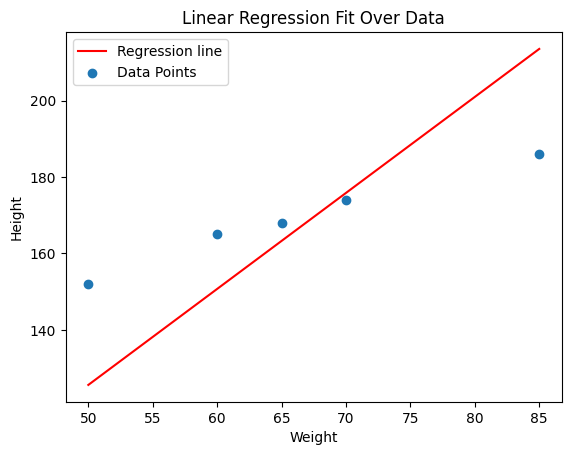


Display Loss function


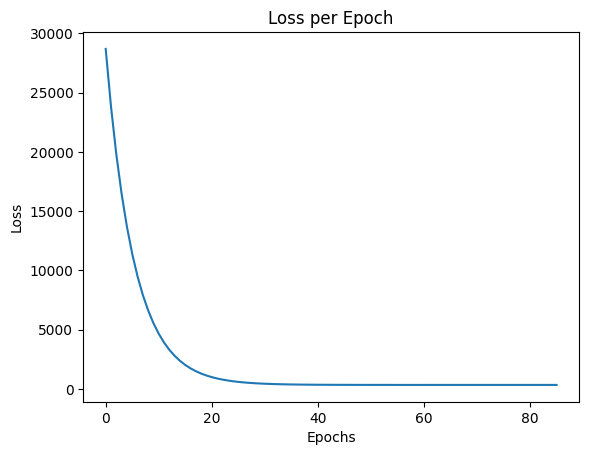


Testing Model on a new instance with input weight of (74) and height of (174)
Model prediction for height: 185.8797
Loss (MSE): 141.1266


In [29]:
# data
x = np.array([50, 60, 65, 70, 85], dtype=np.float64)
y = np.array([152,165,168,174,186], dtype=np.float64)

# csv 
with open('weight_height_data.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['weight','height'])
    for i , j in zip(x,y):
        writer.writerow([i,j])

print("Printing instances in dataset")
data = pd.read_csv('./weight_height_data.csv')
print(data)

# plot data before fitting
plt.scatter(data = data, x='weight', y='height')
plt.suptitle("Weights and Heights")
plt.title("Data points in the dataset before fitting regression line")
plt.xlabel("Weights")
plt.ylabel("Heights")
plt.show()

# train
print("Training - Epochs and Loss per each epoch\n")
slr = SimpleLinearRegression()
slr.gradient_descent(x, y) # maybe if i created a fit() and handle the calling/model choosing if i deployed the code and added more algorithms?
print("Training Finished")

# print model parameters
print(f"\nSlope After training: {float(slr.slope)}")
print(f"Intercept After training: {float(slr.intercept)}")

# plot data with fitting line
print("\nData with best-fit regression line")
# create the line x coordinates
x_line = np.array([min(data['weight']), max(data['weight'])])
# create the line y coordinates
y_line = slr.predict(x_line)
# plot the line on data
plt.plot(x_line, y_line, color='red', label='Regression line')
plt.scatter(data['weight'], data['height'], label='Data Points')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.title('Linear Regression Fit Over Data')
plt.show()

# plot loss per epoch
print("\nDisplay Loss function")
epochs = np.array([i for i in range(slr.epochs) if i < len(slr.loss)])
plt.plot(epochs, slr.loss)
plt.title("Loss per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# prediction -> true input = 74, true label = 174
y_pred = slr.predict(74)
# calculate loss (MSE)
mse = slr.mse_loss(174, y_pred)
print(f"\nTesting Model on a new instance with input weight of (74) and height of (174)\nModel prediction for height: {y_pred:.4f}\nLoss (MSE): {mse:.4f}")

### Code Logic Explination


1. Using class implementation for the model algorithm will make code deployment easier. Also, it will help storing important variables like model weights, loss, and keep track of these variables. 

2. Gradient means: multiple math statements in a derivation form, Descent: is where these derivatives are meant to minimize the statements value. This is the brilliant idea of this algorithm it uses derivatives to bring loss values closer to zero adjusting weights along the way as it gets closer to the optimal solution.

3. Explaining algoritm using code snippets:

**the algorithm starts with dummy values and tries to map a way from this starting point to adjust them later**
```python
B0 = 0.0 # start with dummy values for slope and intercept
B1 = 0.0
```
**then we plug those dummy values to measure an output**
```python
y_pred = B0 + B1 * x
```
**then calculate how much the outptu is far off from the optimal values**
```python
curr_loss = np.mean((y-y_pred)**2)
```
**in this step we take the derivative of the loss function which calculate the step size**
```python
grad_B0 = -2.0 * np.sum(y - y_pred) * 1/n # 1/n help normalizing gradient so it doesn't get uncontrollably large! 'Exploding Gradient'
# partial derivative for intercept
grad_B1 = -2.0 * np.sum(x * (y - y_pred)) * 1/n
```
**the step size should be adjusted with the learning rate which is a value that controls how big each step is going to be (at the beginning the steps are going to be big and then it gets smaller toward the optimal values so it does not miss it and keep growing)**
```python
# adjust weights 
B0 = B0 - (grad_B0 * learning_rate) # changing old slope
B1 = B1 - (grad_B1 * learning_rate) # changing old intercept
```

### Additionals 
##### Analytical and sklearn implementation

In [37]:
# hypothesis function
def prediction(x, slope, intercept):
    '''Predict Y giving an input and weights'''
    return slope * x + intercept
# loss function
def mse_loss(y, y_pred):
    '''Compute the Mean Square Error (MSE)'''
    return np.mean((y-y_pred)**2)

# Analytical appraoch - closed-form computation
def least_square(x: list, y: list, n: int) -> tuple:
    '''Compute intercept and slope for SLR'''
    mean_y = sum(y)/n
    mean_x = sum(x)/n

    numerator = (sum((x_i - mean_x) * (y_i - mean_y) for x_i, y_i in zip(x,y)))/(n-1)
    denominator = (sum((x_i - mean_x)**2 for x_i in x))/(n-1)
    # division by zero handling
    if denominator == 0:
        raise ValueError("Cannot compute slope: Variance of x is zero")
    # parameters
    slope = numerator/denominator
    intercept = mean_y - slope * mean_x
    # prediction
    y_pred =  intercept + slope * x
    # loss
    mse = mse_loss(y=y, y_pred=y_pred)
    return slope, intercept, mse

def least_square_np(x: np.array, y: np.array)-> tuple:
    '''Compute slope and intercept using numpy for better performance'''
    # calculate parameters 
    slope = np.cov(x, y)[0,1] / np.var(x, ddof=1) # bias=True for population covariance (n-1)
    intercept = np.mean(y) - slope * np.mean(x)
    # loss function
    y_pred =  intercept + slope * x
    mse = mse_loss(y=y, y_pred=y_pred)
    return slope, intercept, mse


# sklearn approach
def slr_sklearn(X: np.array, y: np.array): 
    '''Compute slope and intercept using sklearn for results comparsion '''   
    slr = LinearRegression()
    slr.fit(X=X, y=y)
    y_pred = slr.coef_ * X + slr.intercept_
    mse = mean_squared_error(y, y_pred)
    return slr.coef_, slr.intercept_, mse


#### Additionals Test Code

In [45]:
# data
X = np.array([50, 60, 65, 70, 85], dtype=np.float64)
y = np.array([152,165,168,174,186], dtype=np.float64)

# prediction and evaluation
input = 74
output = 174

# analytical
n = len(X)
slope, intercept, mse_1 = least_square(X, y, n)
y_pred_1 = intercept + slope * input
loss = mse_loss(output, y_pred_1)
print(f"analytical training loss(mse): {mse_1:.4f} | prediction: {y_pred_1:.4f} | test loss(mse): {loss:.4f}")
      
# sklearn
sklearn_slope, sklearn_intercept, mse_3 = slr_sklearn(X.reshape(-1, 1), y.reshape(-1, 1))
y_pred_3 = sklearn_intercept + sklearn_slope * input
loss_sk = mse_loss(output, y_pred_3)
print(f"\nsklearn training loss(mse): {mse_3:.4f} | prediction: {y_pred_3[0,0]:.4f} | test loss(mse): {loss:.4f}")

# identical results which shows that least square is theoritacly optimal

analytical training loss(mse): 1.7313 | prediction: 176.6418 | test loss(mse): 6.9791

sklearn training loss(mse): 1.7313 | prediction: 176.6418 | test loss(mse): 6.9791


#### Conclusion

1. Simple Linear Regression models relationship between one input and one output. Using the closed-form computation (the least square) is a direct solution to find the best regression line. It is a predefined mathematical formula based on theory that gradients will have a point with zero slope (the lowest point in the slope-intercept-error 3D graph). Which leads the formula to set the partial derivatives to zero and solve for the weights accordingly. This methodology can work with small to medium size datasets but can have computational limitation over larger datasets. Using Gradient Descent in this case will have better performance since it iteratively adjusts weights according to error values of gradients, making it more suitable and scalable for large datasets. When facing polynomial problems, gradient descent approach describes the concept of learning and generalization, which is improving prediction to offer advantages for real-world problems, and handling non-linear relationships[2,3,8].

2. The results of **sklearn** appraoch and the **closed-form** appraoch being almost identical clearly emphisize on the fact that it is safe to assume the existance of a point in the Sum of the Squared Residuals graph or in this case the MSE graph which is a 3D graph that has all the possible predicted values of the slope, intercept, and the error calculated creating a bowl-shaped graph which is gurenteed to have a point (the lowest point in the graph) which the slope of this point is zero.

3. The process of building both versions taught me how different implementation affect model performance, numerical stability, and results precision. While they both show identical results -due to the small dataset and the simple linear problem-, but overall, Numpy vectorized operations help in reducing memory usage, minimizing calculation roundings, avoiding indexing bugs, and presenting a clearer syntax for better in-practice performance. One of the reasons is because it uses a compiled backend with highly optimized c/c++ code that gives Numpy -and other Machine Learning libraries- those advantages[1,5,7].

4. While training the linear regression model, I noticed that MSE magnifies large errors, which affects gradient descent function (calculating derivatives and adjusting weights). These large errors displayed super large and inefficient weights indicating the exploding gradients problem. This problem commonly assotiated when MSE is used as the loss function. To handle exploding gradients, I tried multiple values for the learning rate, adjusting it manually, running the code, and comparing results. It was a simple yet effective appraoch. For more comperhensive learning and understanding, I will explore more techniques to develop and optimize this model[9].

5. One of the additional edits I will be making to the code is to automate the process of tunning model's parameters (learning rate and epochs and initial values of slope and intercept) by creating a list of all the exceptable values for these parameters and the snippet will try the combinations to find the best training results and save the best model. This method is called **Grid Search**.

6. Exploding gradients can be addressed through more advanced techniques, and in future edits of the model, I plan to use activation functions as part of the solution. This approach will help regulate gradient flow during training, making the optimization process more stable and improving overall model performance[9].

### References
   
1. [YT - StatQuest: Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8&t=1201s)

##### Aditional References

2. [Proof: Ordinary least squares for simple linear regression](https://statproofbook.github.io/P/slr-ols.html)
    
3. STAT301 course: Linear Regression Statistical Model, Mean Squared Error.
    
4. MATH203 course: Calculus1 - Partial Derivatives.
    
5. AI221 course: Python Programming - CSV files, Data Visualization, Simple Linear Regression.
    
6. [YT - StatQuest: The Main Ideas of Fitting a Line to Data (The Main Ideas of Least Squares and Linear Regression.)](https://www.youtube.com/watch?v=PaFPbb66DxQ)
    
7. [How to implement a gradient descent in python to find a local minimum](https://www.geeksforgeeks.org/machine-learning/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/)

8. [Normal Equation in Linear Regression GeeksforGeeks](https://www.geeksforgeeks.org/machine-learning/ml-normal-equation-in-linear-regression/)

9. [Exploding Gradients in Deep Learning | Ultralytics](https://www.ultralytics.com/glossary/exploding-gradient#what-causes-exploding-gradients)